<a href="https://colab.research.google.com/github/axiao23/Sentinel2--Applications-to-Farming/blob/main/ManhattanDataNDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  NDVI Analysis of Manhattan Using Sentinel-2 Imagery

This Colab notebook performs analysis of Manhattan (NDVI) using Sentinel-2 satellite data. Below is a step-by-step breakdown of the operations performed in the script:

---

##  Mounting Google Drive

The first step mounts a personal Google Drive to the Colab environment. This allows access the Sentinel-2 image files stored in Drive. The files used here are part of the `.SAFE` archive downloaded directly and manually from the Copernicus Open Access Hub
---

##  Selecting Bands: Red and NIR

The analysis uses two key bands from the Sentinel-2 dataset:
- **Band 4 (Red)**
- **Band 8 (Near-Infrared or NIR)**

These `.jp2` files are selected manually from the `IMG_DATA` folder of the .SAFE directory.

---

##  Installing and Importing Dependencies

The script installs and imports required libraries:
- `rasterio` for reading `.jp2` raster files.
- `matplotlib` for visualizing the images and NDVI results.
- `numpy` for numerical calculations.
- `scipy.ndimage` (optional) for image resizing in case dimensions mismatch.

---

##  Loading Band Data

Each `.jp2` file is opened with `rasterio`, and the first band is read as a numpy array. These arrays represent pixel numerical values for each band. A quick dimension check ensures both bands have the same shape and thus can be combined in later analysis.

---

##  Visualizing Band Images

The script plots the raw Red band using `matplotlib.pyplot.imshow()` with a color map like `'inferno'`. This helps to visualize the data and ensure it is properly loaded.

---

##  NDVI Calculation

NDVI is calculated using the manual formula: NDVI = (NIR - Red) / (NIR + Red)


This operation is performed using the loaded numpy arrays for the NIR(B04) and Red bands(B08). The result is a new 2D array where each pixel represents the NDVI value at that location.

---

##  Visualizing NDVI

The NDVI image is visualized using a colormap defined in python. Here we ultimately use `'RdYlGn'`, where:
- Green indicates healthy vegetation (values close to 1)
- Yellow indicates sparse vegetation, (values around the median NDVI)
- Red indicates little or no vegetation (values close to 0)

A key is added to show the NDVI value scale.

---

##  Cropping the Image

To focus specifically on Manhattan (especially Central Park), a pixel window is defined to zoom onto the image initially captured by copernicus.
```python
min_x = 8000
min_y = 7000
max_x = 9000
max_y = 10000





In [ ]:
#mount my google drive into colab to access manhattan data
from google.colab import drive
drive.mount('/content/drive')
#ive identified that these two images/bands provide the best picture for manhattan
file_pathBO4 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHB04_1.jp2'
file_pathBO8 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHBO8_1.jp2'

In [ ]:
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt
#checking the dimensions of the two images:
# Open a JP2 file
#loading in the red band
with rasterio.open(file_pathBO4) as dataset:
    # Read the first band as a NumPy array
    image_data1 = dataset.read(1)

# Open a JP2 file
#loading in the infared red band
with rasterio.open(file_pathBO8) as dataset:
    # Read the first band as a NumPy array
    image_data2 = dataset.read(1)
width = image_data1.shape[0]
height = image_data1.shape[1]
width2 = image_data2.shape[0]
height2 = image_data2.shape[1]
#print statements that double check the dimensions of the images
print(f"The red band resolution is: {width}x{height}")
print(f"The infared red band resolution is: {width2}x{height2}")

The red band resolution is: 10980x10980
The infared red band resolution is: 10980x10980


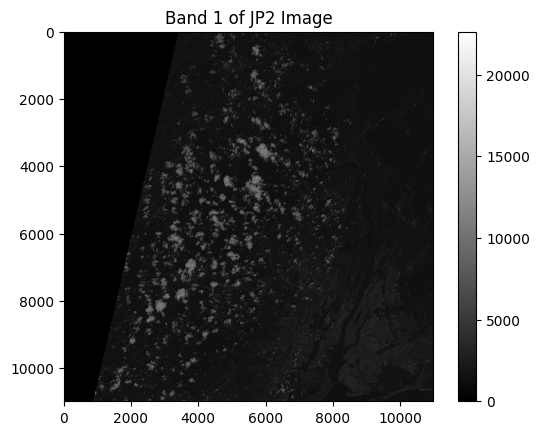

In [ ]:
!pip install rasterio
#rasterio is a package that allows us to open images as raster files
import rasterio
import matplotlib.pyplot as plt
with rasterio.open(file_pathBO4) as dataset:
    # Read the first band as a NumPy array
    image_data = dataset.read(1)
# Plotting the image data (first band)
plt.imshow(image_data, cmap='gray')
plt.title("Band 1 of JP2 Image")
plt.colorbar()
plt.show()



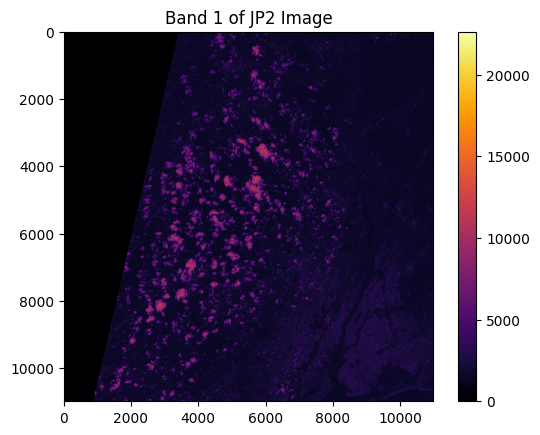

<ipython-input-6-71681c7fcdfc>:43: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


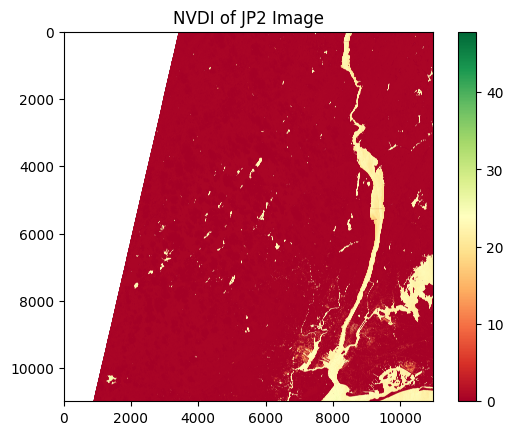

In [ ]:
#importing and loading the infared red and red bands (band 5 and band 4 respectively @ 20m)
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

#change the file path to your local path containing the data for that specific image
file_pathBO4 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHB04_1.jp2'
file_pathBO8 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHBO8_1.jp2'

# Opening a JP2 file
#loading in the red band
with rasterio.open(file_pathBO4) as dataset:
    # Read the first band as a NumPy array
    image_data1 = dataset.read(1)

# Openinng a JP2 file
#loading in the infared red band
with rasterio.open(file_pathBO8) as dataset:
    # Read the first band as a NumPy array
    image_data2 = dataset.read(1)

# Plot the image using a color map (e.g., 'viridis', 'plasma', 'inferno')
plt.imshow(image_data1, cmap='inferno')
plt.title("Band 1 of JP2 Image")
plt.colorbar()
plt.show()



# Now both red_band and resized_nir_band have the same shape
'''print(image_data1)
print(image_data2)
print(len(image_data1))'''
#calculating the NVDI for the bands which make up the red and the infared red
red = image_data1
nir = image_data2

# Example: Assuming red_band is smaller (5490, 5490) and nir_band is larger (10980, 10980)
#resized_red_band = scipy.ndimage.zoom(red, (nir.shape[0] / red.shape[0],
                                                #nir.shape[1] / red.shape[1]), order=3)
#ndvi = (nir - resized_red_band)/ (nir + resized_red_band)
ndvi = (nir - red) / (nir + red)

#plotting the NVDI
plt.imshow(ndvi, cmap='RdYlGn')
plt.title("NDVI of JP2 Image")
plt.colorbar()
plt.show()

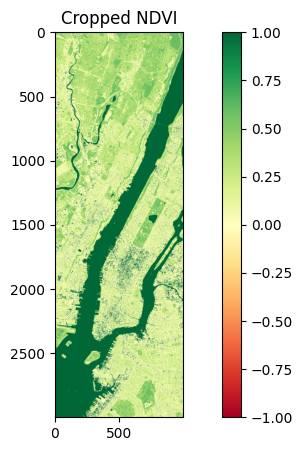

In [ ]:
#changing the color to reflect green and yellow and cropping the image to zoom into manhattan
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

file_pathBO4 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHB04_1.jp2'
file_pathBO8 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHBO8_1.jp2'

# Cropping and displaying a section that better shows central park etc
min_x = 8000
min_y = 7000
max_x = 9000
max_y = 10000

#opening the file with rasterio, same code as above to display
with rasterio.open(file_pathBO4) as dataset:
  window = rasterio.windows.Window(min_x, min_y, max_x - min_x, max_y - min_y)
  cropped_image1 = dataset.read(1, window=window)

with rasterio.open(file_pathBO8) as dataset:
  window = rasterio.windows.Window(min_x, min_y, max_x - min_x, max_y - min_y)
  cropped_image2 = dataset.read(1, window=window)

cropped_ndvi = (cropped_image2 - cropped_image1) / (cropped_image2 + cropped_image1)

plt.figure(figsize=(10, 5))
plt.imshow(cropped_ndvi, cmap='RdYlGn', vmin=-1, vmax=1) #changing the color in this line
plt.title("Cropped NDVI")
plt.colorbar()
plt.show()

